In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [314]:
exp = np.random.randint(low=2,high=11, size= 500)

(array([54., 55., 49., 66.,  0., 60., 68., 65., 42., 41.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

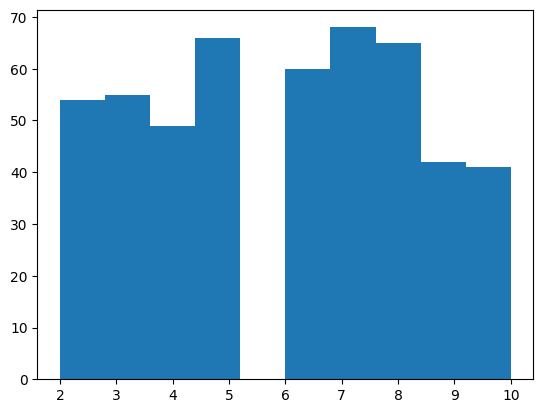

In [315]:
plt.hist(exp)

In [316]:
salary = 2*exp +3 + np.random.normal(loc=0, scale=2,size=500)

Text(0, 0.5, 'Salary in lakhs of Rupees (Y)')

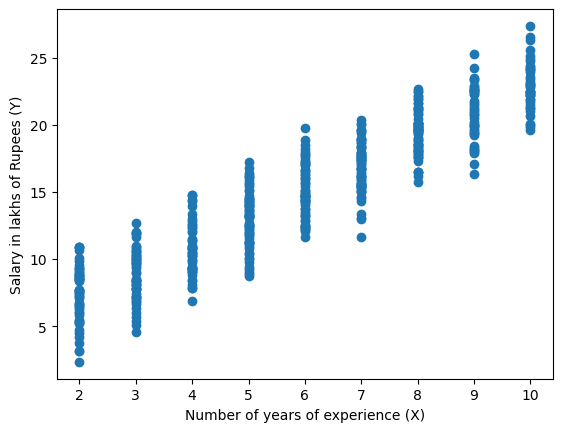

In [317]:
plt.scatter(exp,salary)
plt.xlabel("Number of years of experience (X)")
plt.ylabel("Salary in lakhs of Rupees (Y)")

In [318]:
training_data = pd.DataFrame(data={"X (experience)":exp,"Y (salary)" : salary })

In [319]:
training_data

,X (experience),Y (salary)
0,3,8.398569
1,8,19.927939
2,7,18.288462
3,8,18.475775
4,4,12.498307
...,...,...
495,5,13.205879
496,8,21.334282
497,7,17.359325
498,3,10.735401


In [320]:
x = np.array(training_data["X (experience)"])
y = np.array(training_data["Y (salary)"])

In [321]:
def nll(theta0,theta1):
    
    x = np.array(training_data["X (experience)"])
    mu_y_condition_x = (theta1*x) + theta0
    squared_error = (y - mu_y_condition_x)**2
    mse = np.mean(squared_error)
    return (1/2)*mse

In [322]:
def del_by_del_theta(theta0_initial,theta1_initial):
    
    x = np.array(training_data["X (experience)"])
    mu_y_condition_x = (theta1_initial*x) + theta0_initial
    error = (mu_y_condition_x - y)
    
    #error = error.reshape(error(500,1))
    #or
    error = error.reshape(500,1)
    #error_transpose = error.T
    #error = np.expand_dims(error , -1)
    error_transpose = np.transpose(error)
    x = np.expand_dims(x , -1)
    #print(x.shape,error_transpose.shape)
    del_by_del_theta1 = (1/error.shape[0])*np.matmul(error_transpose,x)
    del_by_del_theta0 = np.mean(error)
    
    return[del_by_del_theta0,del_by_del_theta1]

In [323]:
epsilon = 10**(-2)
epoch_counter = 0
theta0_initial = 0
theta1_initial = 0
tol = 10**(-8)

while True:

    initial_gradients = del_by_del_theta(theta0_initial ,theta1_initial)

    theta0_final = theta0_initial - (epsilon * initial_gradients[0])
    theta1_final = theta1_initial - (epsilon * initial_gradients[1])

    nll_initial_value = nll(theta0_initial,theta1_initial)
    nll_final_value = nll(theta0_final,theta1_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1

    theta0_initial = theta0_final
    theta1_initial = theta1_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

Epoch # 1, NLL Value = 123.10736440103372
Epoch # 2, NLL Value = 43.77558426709153
Epoch # 3, NLL Value = 16.582914405018514
Epoch # 4, NLL Value = 7.261384792482506
Epoch # 5, NLL Value = 4.065348129474901
Epoch # 6, NLL Value = 2.9688807738254717
Epoch # 7, NLL Value = 2.5920620773035625
Epoch # 8, NLL Value = 2.4619121261370442
Epoch # 9, NLL Value = 2.4163128981484383
Epoch # 10, NLL Value = 2.3996970111174525
Epoch # 11, NLL Value = 2.3930182492550767
Epoch # 12, NLL Value = 2.3897483469195
Epoch # 13, NLL Value = 2.3876496757009282
Epoch # 14, NLL Value = 2.385955260757545
Epoch # 15, NLL Value = 2.384402206680339
Epoch # 16, NLL Value = 2.382900395730324
Epoch # 17, NLL Value = 2.381418931253407
Epoch # 18, NLL Value = 2.3799472151647634
Epoch # 19, NLL Value = 2.378481606915141
Epoch # 20, NLL Value = 2.3770208507344877
Epoch # 21, NLL Value = 2.3755645082795174
Epoch # 22, NLL Value = 2.374112421409869
Epoch # 23, NLL Value = 2.372664528049846
Epoch # 24, NLL Value = 2.3712207

In [324]:
theta1_final

array([[1.9956794]])

In [325]:
theta0_final

np.float64(3.0439950614596745)

In [326]:
predicted_salary=(theta1_final*5) + theta0_final

In [327]:
predicted_salary

array([[13.02239206]])